## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import random

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#print([mouse_metadata])
#print([study_results])
# Combine the data into a single dataset
merged_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# from Readme.MD: Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

drug_groups = merged_data.groupby(["Drug Regimen"])
drug_group_mean = round(drug_groups['Tumor Volume (mm3)'].mean(),2)
drug_group_median = round(drug_groups['Tumor Volume (mm3)'].median(),2)
drug_group_var = round(drug_groups['Tumor Volume (mm3)'].var(),2)
drug_group_std = round(drug_groups['Tumor Volume (mm3)'].std(),2)
drug_group_sem = round(drug_groups['Tumor Volume (mm3)'].sem(),2)
drug_group_df = pd.merge(drug_group_mean,drug_group_median, on='Drug Regimen')
drug_group_df = pd.merge(drug_group_df,drug_group_var, on='Drug Regimen')
drug_group_df = pd.merge(drug_group_df,drug_group_std, on='Drug Regimen')
drug_group_df = pd.merge(drug_group_df,drug_group_sem, on='Drug Regimen')
drug_group_df.columns = ['Tumor Volume Mean','Tumor Volume Median','Tumor Volume Variance','Tumor Volume Std Dev','Tumor Volume SEM']
drug_group_df

# Alt code:
# summary_df = df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
# summary_df.columns = ['Tumor V Mean','Tumor V Median','Tumor V Variance',
#                       'Tumor V Std','Tumor V SEM']
# summary_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the number of data points for each treatment regimen.

  **NOTE:** These plots should look identical.

[Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64]


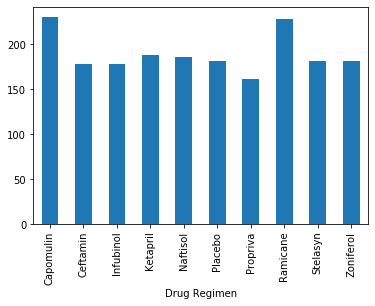

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_dp_count = drug_groups['Timepoint'].count()
print([drug_dp_count])
drug_dp_count.plot.bar()

([<matplotlib.axis.XTick at 0x1f2e1af3bc8>,
 <a list of 10 Text xticklabel objects>)

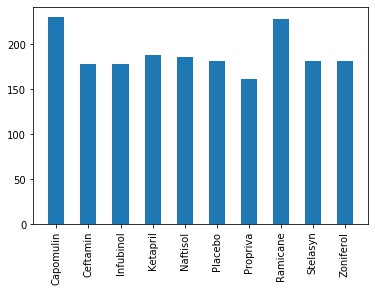

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(drug_groups))
tick_locations = [value for value in x_axis]
drug_dp_count = drug_groups['Timepoint'].count()
#print([drug_dp_count])
plt.bar(x_axis,drug_dp_count,width=.5, align="center")
plt.xticks(tick_locations, drug_dp_count.index.values, rotation="vertical")

## Pie plots

Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.

  **NOTE:** These plots should look identical.

[        Gender Pct
Sex               
Female         124
Male           125]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2E2B53648>],
      dtype=object)

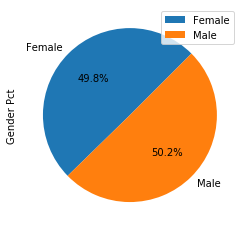

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Sneaking a peak at the mouse metadata csv we can see that the total count of mice is 249
#to get the mouse and gender data I could have just used the mouse_metadata df but decided to use the merged one 
unique_mice = merged_data.loc[:, ['Sex', 'Mouse ID']]
unique_mice = unique_mice.drop_duplicates()
mvf_count = unique_mice.groupby('Sex')
mvf_count = mvf_count.count()
mvf_count.columns = ["Gender Pct"]
print([mvf_count])
mvf_count.plot.pie(subplots=True, autopct='%1.1f%%', startangle=45)

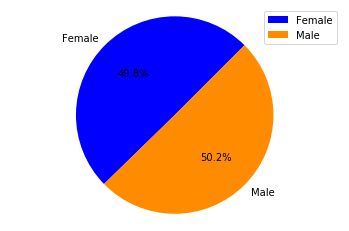

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Data to plot
labels = 'Female', 'Male'
sizes = mvf_count['Gender Pct'].values
colors = ['blue', 'darkorange']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=45)
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

## Quartiles, outliers and boxplots

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#   -Capomulin, Ramicane, Infubinol, and Ceftamin. 

#Final tumor volume would be the tumor volume found in the last timepoint of each mouse
#
new_merged_data =pd.merge(study_results,mouse_metadata, on="Mouse ID", how="inner")
refined_data = new_merged_data[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
capomulin_data = refined_data.loc[refined_data['Drug Regimen'] == 'Capomulin']
capomulin_data = capomulin_data.groupby("Mouse ID").tail(1)
#print([capomulin_data])
ramicane_data = refined_data.loc[refined_data['Drug Regimen'] == 'Ramicane']
ramicane_data = ramicane_data.groupby("Mouse ID").tail(1)
#print([ramicane_data])
infubinol_data = refined_data.loc[refined_data['Drug Regimen'] == 'Infubinol']
infubinol_data = infubinol_data.groupby("Mouse ID").tail(1)
#print([infubinol_data])
ceftamin_data = refined_data.loc[refined_data['Drug Regimen'] == 'Ceftamin']
ceftamin_data = ceftamin_data.groupby("Mouse ID").tail(1)
#print([ceftamin_data])



Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [8]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin IQR Data
cap_iqr_data = capomulin_data['Tumor Volume (mm3)']
cap_quartiles = round(cap_iqr_data.quantile([.25,.5,.75]),2)
cap_lowerq = round(cap_quartiles[0.25],2)
cap_upperq = round(cap_quartiles[0.75],2)
cap_iqr = round(cap_upperq-cap_lowerq,2)

print(color.BOLD + 'Capomulin IQR Data'+ color.END)
print(f"The lower quartile of tumor volume is: {cap_lowerq}")
print(f"The upper quartile of tumor volume is: {cap_upperq}")
print(f"The interquartile range of tumor volume is: {cap_iqr}")
print(f"The the median of tumor volume is: {cap_quartiles[0.5]} ")

cap_lower_bound = round(cap_lowerq - (1.5*cap_iqr),2)
cap_upper_bound = round(cap_upperq + (1.5*cap_iqr),2)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

# Ramicane IQR Data
ram_iqr_data = ramicane_data['Tumor Volume (mm3)']
ram_quartiles = round(ram_iqr_data.quantile([.25,.5,.75]),2)
ram_lowerq = round(ram_quartiles[0.25],2)
ram_upperq = round(ram_quartiles[0.75],2)
ram_iqr = round(ram_upperq-ram_lowerq,2)

print(color.BOLD + 'Ramicane IQR Data'+ color.END)
print(f"The lower quartile of tumor volume is: {ram_lowerq}")
print(f"The upper quartile of tumor volume is: {ram_upperq}")
print(f"The interquartile range of tumor volume is: {ram_iqr}")
print(f"The the median of tumor volume is: {ram_quartiles[0.5]} ")

ram_lower_bound = round(ram_lowerq - (1.5*ram_iqr),2)
ram_upper_bound = round(ram_upperq + (1.5*ram_iqr),2)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

# Infubinol IQR Data
inf_iqr_data = infubinol_data['Tumor Volume (mm3)']
inf_quartiles = round(inf_iqr_data.quantile([.25,.5,.75]),2)
inf_lowerq = round(inf_quartiles[0.25],2)
inf_upperq = round(inf_quartiles[0.75],2)
inf_iqr = round(inf_upperq-inf_lowerq,2)

print(color.BOLD + 'Infubinol IQR Data'+ color.END)
print(f"The lower quartile of tumor volume is: {inf_lowerq}")
print(f"The upper quartile of tumor volume is: {inf_upperq}")
print(f"The interquartile range of tumor volume is: {inf_iqr}")
print(f"The the median of tumor volume is: {inf_quartiles[0.5]} ")

inf_lower_bound = round(inf_lowerq - (1.5*inf_iqr),2)
inf_upper_bound = round(inf_upperq + (1.5*inf_iqr),2)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

# Ceftamin IQR Data
cef_iqr_data = ceftamin_data['Tumor Volume (mm3)']
cef_quartiles = round(cef_iqr_data.quantile([.25,.5,.75]),2)
cef_lowerq = round(cef_quartiles[0.25],2)
cef_upperq = round(cef_quartiles[0.75],2)
cef_iqr = round(cef_upperq-cef_lowerq,2)

print(color.BOLD + 'Ceftamin IQR Data'+ color.END)
print(f"The lower quartile of tumor volume is: {cef_lowerq}")
print(f"The upper quartile of tumor volume is: {cef_upperq}")
print(f"The interquartile range of tumor volume is: {cef_iqr}")
print(f"The the median of tumor volume is: {cef_quartiles[0.5]} ")

cef_lower_bound = round(cef_lowerq - (1.5*cef_iqr),2)
cef_upper_bound = round(cef_upperq + (1.5*cef_iqr),2)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

Capomulin IQR Data
The lower quartile of tumor volume is: 32.38
The upper quartile of tumor volume is: 40.16
The interquartile range of tumor volume is: 7.78
The the median of tumor volume is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
Ramicane IQR Data
The lower quartile of tumor volume is: 31.56
The upper quartile of tumor volume is: 40.66
The interquartile range of tumor volume is: 9.1
The the median of tumor volume is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Infubinol IQR Data
The lower quartile of tumor volume is: 54.05
The upper quartile of tumor volume is: 65.53
The interquartile range of tumor volume is: 11.48
The the median of tumor volume is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
Ceftamin IQR Data
The lower quartile of tumor volume is: 48.72
The upper quartile of tumor volume is: 64.3
The interquartile range of tumor volume is: 15.58
The the median o

Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

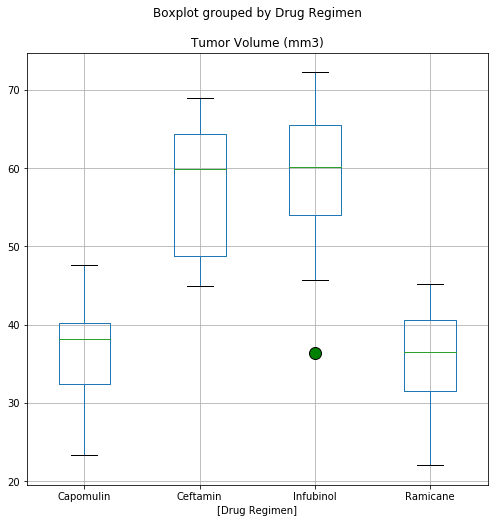

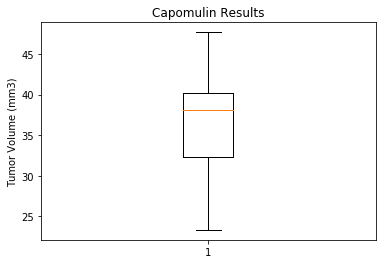

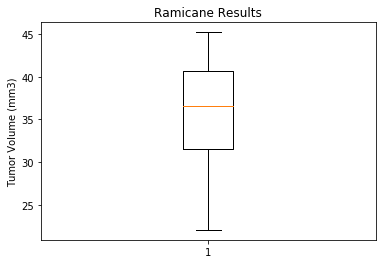

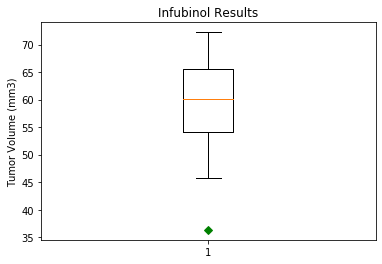

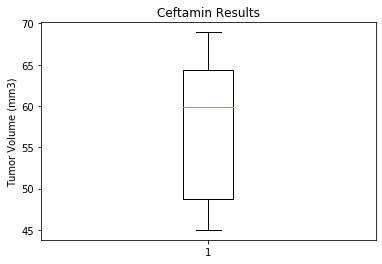

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
combined_data = capomulin_data[['Tumor Volume (mm3)',"Drug Regimen"]]
combined_data = combined_data.append(ramicane_data[['Tumor Volume (mm3)',"Drug Regimen"]])
combined_data = combined_data.append(infubinol_data[['Tumor Volume (mm3)',"Drug Regimen"]])
combined_data = combined_data.append(ceftamin_data[['Tumor Volume (mm3)',"Drug Regimen"]])
#print([combined_data])

flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')

combined_data.boxplot(by="Drug Regimen", flierprops=flierprops, figsize=(8,8))
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Results')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin_data['Tumor Volume (mm3)'], 0, 'gD')
plt.show()

fig2, ax2 = plt.subplots()
ax2.set_title('Ramicane Results')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(ramicane_data['Tumor Volume (mm3)'], 0, 'gD')
plt.show()

fig3, ax3 = plt.subplots()
ax3.set_title('Infubinol Results')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(infubinol_data['Tumor Volume (mm3)'], 0, 'gD')
plt.show()

fig4, ax4 = plt.subplots()
ax4.set_title('Ceftamin Results')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(ceftamin_data['Tumor Volume (mm3)'], 0, 'gD')
plt.show()




## Line and scatter plots

Results for subject: ['m601']


Text(0, 0.5, 'Tumor Volume (mm3)')

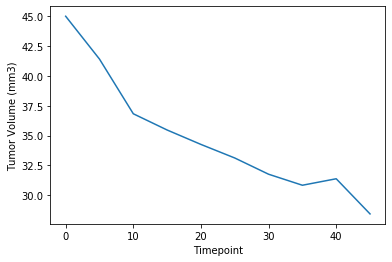

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_line_data = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']
mouse_list = capomulin_line_data.drop_duplicates(['Mouse ID'])
mouse_list = list(mouse_list['Mouse ID'])
chosen_mouse_data = capomulin_line_data.loc[capomulin_line_data['Mouse ID'] == random.choice(mouse_list)]
subjectid = chosen_mouse_data.iloc[0]['Mouse ID']
x_values = chosen_mouse_data['Timepoint']
y_values = chosen_mouse_data['Tumor Volume (mm3)']
print("Results for subject: " + color.BOLD + str([subjectid]) + color.END)
plt.plot(x_values,y_values)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

[          Weight (g)  Tumor Volume (mm3)
Mouse ID                                
b128              22               41.96
b742              21               40.08
f966              17               36.51
g288              19               41.99
g316              22               44.61
i557              24               44.81
i738              20               39.14
j119              23               44.47
j246              21               43.22
l509              21               44.43
l897              19               42.51
m601              17               34.85
m957              19               39.05
r157              25               45.80
r554              17               36.51
r944              25               43.37
s185              17               34.56
s710              23               42.80
t565              17               39.33
u364              17               39.89
v923              21               41.58
w150              23               41.38
w914           

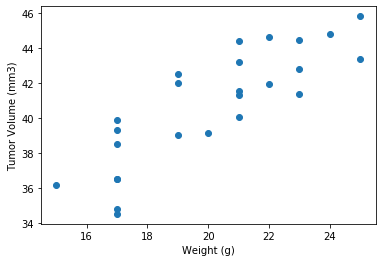

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Logic:
#    Use "capomulin_data" to create a new table groupby mouse id then mouse weight and average tumor volume
capomulin_grouped = capomulin_line_data.groupby(['Mouse ID'])
capomulin_weight = capomulin_grouped['Weight (g)'].mean()
capomulin_atv = round(capomulin_grouped['Tumor Volume (mm3)'].mean(),2)
plotinfo = pd.merge(capomulin_weight,capomulin_atv, on='Mouse ID')
print([plotinfo])
plt.scatter(plotinfo.iloc[:,0],plotinfo.iloc[:,1])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


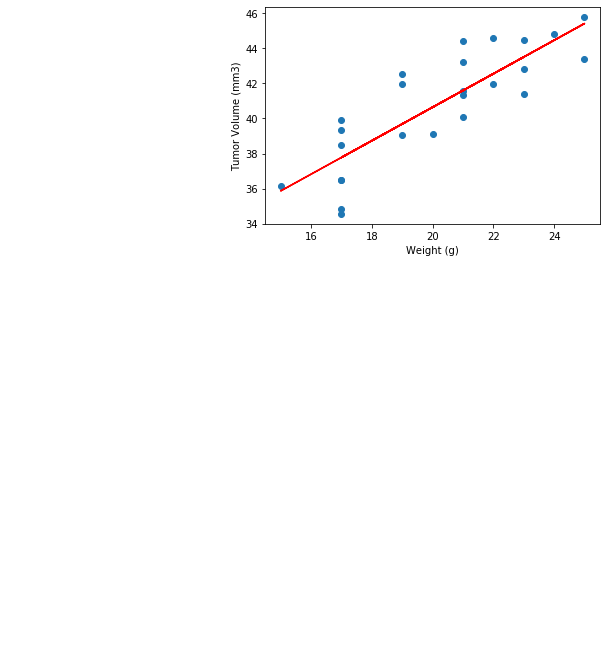

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = plotinfo.iloc[:,0]
y_values = plotinfo.iloc[:,1]
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(x_values,y_values)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Observations
1.) There is a difference between the IQR median for tumor volume and the median tumor volume per drug regime because the drug regime is finding the median of significantly more records while the IQR median is only looking at the final Tumor volume.

2.) Correlation is an effect size and so we can verbally describe the strength of the
correlation using the guide that Evans (1996) suggests for the absolute value of r:
- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”
So based on the results of that "The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84", we can say that there is a very strong positive correlation.

3.) More data digging would be required to see if there was a significant difference between the drugs effects on male vs female mice.
